In [2]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from dtaidistance import dtw

In [3]:
# get a list of file names from approx directory

approx_directory = './approx'
control_directory = './control'
file_names = []
for root, dirs, files in os.walk(approx_directory):
    for file in files:
        if file.endswith('.wav'):
            file_names.append(file)

file_names

['aidadsp-tw40_blues_deluxe_deerinkstudios.wav',
 'aidadsp-tw40_blues_solo_deerinkstudios.wav',
 'aidadsp-tw40_british_lead_deerinkstudios.wav',
 'aidadsp-tw40_british_rhythm_deerinkstudios.wav',
 'aidadsp-tw40_california_clean_deerinkstudios.wav',
 'aidadsp-tw40_california_crunch_deerinkstudios.wav',
 'ds-tanh_3_256_tf.wav',
 'MLTerror15-0.5-0.5-0.5-model-gru-4.wav',
 'MLTerror15-0.5-0.5-0.5-model-gru-6.wav',
 'MLTerror15-0.5-0.5-0.5-model-lstm-1.wav',
 'MLTerror15-0.5-0.85-0.85-model-gru-5.wav',
 'MLTerror15-0.85-0.5-0.85-model-gru-6.wav',
 'MLTerror15-0.85-0.85-0.85-model-gru-6.wav']

In [24]:

results = []

for file_name in file_names:
    # Load audio files
    y1, sr1 = librosa.load(f'{approx_directory}/{file_name}', sr=None)
    y2, sr2 = librosa.load(f'{control_directory}/{file_name}', sr=None)

    # Compute MFCC features from the audio
    mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
    mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)

    # Compute the distance between the MFCCs
    distance = np.linalg.norm(mfcc1 - mfcc2)
    distances = np.linalg.norm(mfcc1 - mfcc2, axis=0)  # Column-wise distances
    mse = np.mean((mfcc1 - mfcc2)**2)
    esr = np.mean((mfcc1 - mfcc2)**2) / np.mean(mfcc2**2)

    # Store results in a list
    results.append({
        'name': file_name[:-4].replace('_', '\_').replace('-','/',1),
        'max error': np.max(np.abs(y2 - y1)),
        'avg error': np.mean(np.abs(y2 - y1)),
        'mse': mse,
        'esr': esr,
        'overall_distance': distance,
        'distances_over_time': distances
    })

# Create a DataFrame
df = pd.DataFrame(results)

In [25]:
df.sort_values('overall_distance', ascending=False, inplace=True)
df.to_csv('audio error results.csv')
df

,name,max error,avg error,mse,esr,overall_distance,distances_over_time
5,aidadsp/tw40\_california\_crunch\_deerinkstudios,0.300690,0.083280,449.523682,0.055393,3935.808105,"[49.076813, 66.393875, 187.28415, 180.32938, 1..."
1,aidadsp/tw40\_blues\_solo\_deerinkstudios,0.274261,0.024769,181.728485,0.022832,2502.471436,"[15.637945, 19.598104, 34.10864, 34.087353, 33..."
0,aidadsp/tw40\_blues\_deluxe\_deerinkstudios,0.224091,0.050440,151.808380,0.015601,2287.207275,"[31.069725, 37.71254, 93.06027, 74.50411, 62.6..."
3,aidadsp/tw40\_british\_rhythm\_deerinkstudios,0.381012,0.077794,143.273468,0.017746,2221.981934,"[40.16191, 42.332455, 54.718864, 50.128548, 49..."
4,aidadsp/tw40\_california\_clean\_deerinkstudios,0.159729,0.009837,85.640564,0.008632,1717.898071,"[50.988472, 49.344753, 30.748411, 29.617964, 3..."
2,aidadsp/tw40\_british\_lead\_deerinkstudios,0.699188,0.038327,74.542862,0.024405,1602.730835,"[11.480559, 11.753966, 64.260574, 68.47771, 68..."
9,MLTerror15/0.5-0.5-0.5-model-lstm-1,0.819916,0.045873,59.454758,0.019989,1431.366577,"[48.157467, 59.785618, 48.467503, 43.566437, 4..."
6,ds/tanh\_3\_256\_tf,0.032593,0.013562,7.794309,0.001031,518.258545,"[5.2159896, 5.7669125, 6.2167225, 6.5798807, 6..."
11,MLTerror15/0.85-0.5-0.85-model-gru-6,0.667633,0.018956,5.777090,0.003402,446.182129,"[2.850334, 2.927493, 4.114787, 7.6183963, 9.48..."
7,MLTerror15/0.5-0.5-0.5-model-gru-4,0.359421,0.009043,4.698350,0.001815,402.374329,"[10.341144, 9.2052145, 10.327302, 11.488916, 1..."


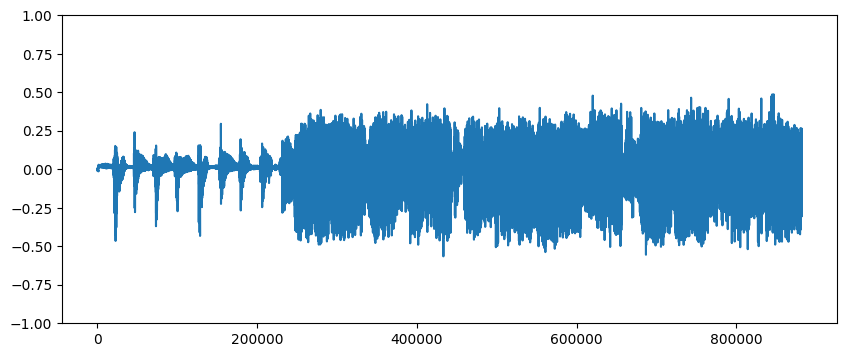

In [26]:
# visualize the audio
plt.figure(figsize=(10, 4))
# set y range -1 to 1
plt.ylim(-1, 1)
plt.plot(y2-y1)
plt.show()


In [27]:
#calculate dtaidistance
distance = dtw.distance_fast(y1.astype(np.double), y2.astype(np.double))
distance

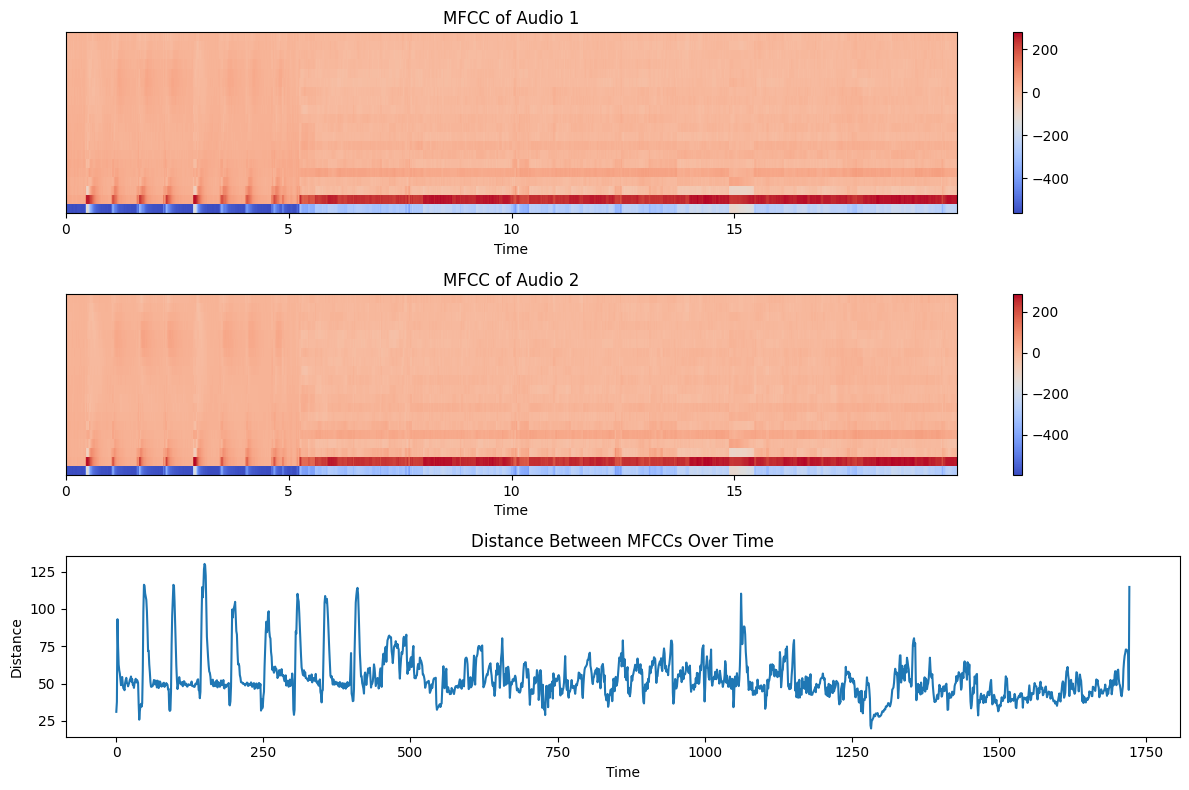

In [ ]:
#visualize the MFCCs

# Plotting the MFCCs of both audio signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.colorbar()
plt.title('MFCC of Audio 1')

plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.colorbar()
plt.title('MFCC of Audio 2')

# Plotting the distance over time
plt.subplot(3, 1, 3)
plt.plot(distances)
plt.title('Distance Between MFCCs Over Time')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.tight_layout()

plt.show()
